In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import datetime

csv_path = r'D:\Weatherford\Flow Measurements\Pilotos de Prueba\PLUSPETROL - LC - G2\DATA_Files\AFC_Files\logs\Log12082020.csv'

data1 = pd.read_csv(csv_path,encoding='utf-8')

ds = data1.copy()

ds['Time'] = pd.to_datetime(ds['Time'])
ds['Time-2'] = ds['Time'] - datetime.timedelta(hours=2)

ds['Time_hs'] = ds['Time-2'].dt.strftime('%Y-%m-%d-%H')

ds1 = ds.copy()
ds1 = ds.groupby('Time_hs').mean()

ds1[["Qg[m3/d]"]] = ds1[["Qg[m3/s]"]] * 86400
ds1[["Ql[m3/d]"]] = ds1[["Ql[m3/s]"]] * 86400
ds1[["Qo[m3/d]"]] = ds1[["Qo[m3/s]"]] * 86400
ds1[["Qw[m3/d]"]] = ds1[["Qw[m3/s]"]] * 86400
ds1[["QgStd[m3/d]"]] = ds1[["QgStd[m3/s]"]] * 86400
ds1[["QlStd[m3/d]"]] = ds1[["QlStd[m3/s]"]] * 86400
ds1[["QoStd[m3/d]"]] = ds1[["QoStd[m3/s]"]] * 86400
ds1[["QwStd[m3/d]"]] = ds1[["QwStd[m3/s]"]] * 86400

#to export to csv data by hour
ds1.to_csv('D:\Google Drive\Deep_Learning\Jupiter_Notebooks\ds\Laborales\G2\out\Log12082020.csv')

In [17]:
import os
import glob
import pandas as pd
os.chdir('D:\Google Drive\Deep_Learning\Jupiter_Notebooks\ds\Laborales\G2\out')

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "D:\Google Drive\Deep_Learning\Jupiter_Notebooks\ds\Laborales\G2\out\combined_csv.csv", index=False,encoding='utf-8-sig')

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


In [32]:
import pandas as pd
import numpy as np

url1 =r'D:\Google Drive\Deep_Learning\Jupiter_Notebooks\ds\Laborales\G2\out\combined_csv.csv'

dsA = pd.read_csv(url1)

dsA['Time_hs'] = pd.to_datetime(dsA['Time_hs'])
dsA['Time_hs'] = dsA['Time_hs'].dt.strftime('%Y-%m-%d %H:%M:%S')
dsA = dsA.sort_values('Time_hs')
dsA.drop_duplicates(subset ='Time_hs',keep='first',inplace=True)
dsA['Time_hs'].head(50)

dsA.to_csv('D:\Weatherford\Flow Measurements\Pilotos de Prueba\PLUSPETROL - LC - G2\DATA_Files\AFC_Files\combined_csv.csv')

In [21]:
#('Time_hs > "2020-07-15 06:00:00" & Time_hs <= "2020-07-19 06:00:00"')

ds1 = dsA.query('Time_hs > "2020-07-25 06:00:00" & Time_hs < "2020-07-27 06:00:00"')

ds1['Time_hs'].tail()


1342    2020-07-27 01:00:00
1343    2020-07-27 02:00:00
1344    2020-07-27 03:00:00
1345    2020-07-27 04:00:00
1346    2020-07-27 05:00:00
Name: Time_hs, dtype: object

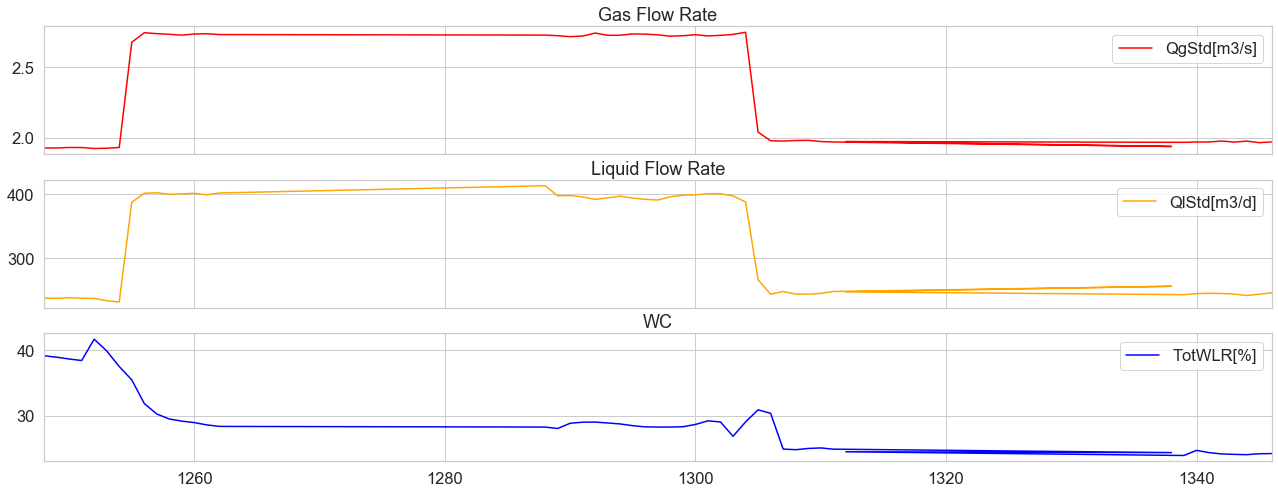

In [26]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,figsize=(22,8),sharex=True)
ds1.plot( y='QgStd[m3/s]',color='red',ax=ax[0])
ds1.plot( y='QlStd[m3/d]',color='orange',ax=ax[1])
ds1.plot(y='TotWLR[%]',color='blue',ax=ax[2])
#dsA.plot(y='ch4[nA]',color='blue',ax=ax[3])
#dsA.plot(y='ch5[nA]',color='blue',ax=ax[4])
#dsA.plot(y='Xl',color='blue',ax=ax[5])
#dsA.plot(y='WaterCut[%]',color='blue',ax=ax[6])
ax[0].set(title="Gas Flow Rate")
ax[1].set(title="Liquid Flow Rate")
ax[2].set(title="WC")
plt.show()